In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression

(442, 10)
(442,)


Text(0.5,1,'Scatter of Two Features')

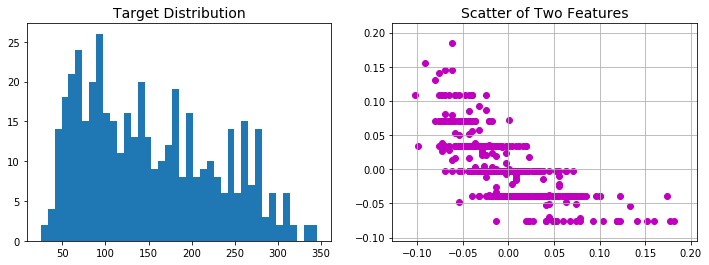

In [18]:
diabetes = datasets.load_diabetes()

X = diabetes.data
print(X.shape)

y = diabetes.target
print(y.shape)

fig = plt.figure(figsize=(12,4))
fig.add_subplot(121)
plt.hist(y, bins=40)
plt.title("Target Distribution", fontsize=14)

fig.add_subplot(122)
plt.scatter(X[:,6], X[:,7], c='m')
plt.grid(True)
plt.title("Scatter of Two Features", fontsize=14)


Text(0.5,1,'Pseudoinverse')

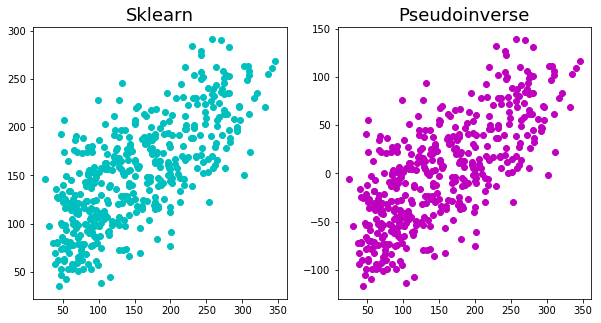

In [29]:
lin = LinearRegression()
lin.fit(X, y)
yh1 = lin.predict(X)

w = np.dot( np.dot( np.linalg.inv(np.dot( X.T, X )), X.T ), y )
yh2 = np.dot(X, w)

fig=plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.scatter(y, yh1, c='c')
plt.grid=True
plt.title("Sklearn", fontsize=18)

fig.add_subplot(122)
plt.scatter(y, yh2, c='m')
plt.grid=True
plt.title("Pseudoinverse", fontsize=18)

Text(0.5,1,'Weights')

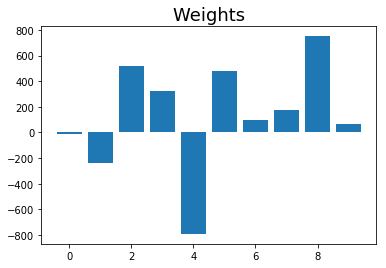

In [49]:
fig=plt.figure(figsize=(6,4))
plt.bar(np.arange(len(w)), w)
plt.title("Weights", fontsize=18)

Text(0.5,1,'Weights (with regularization)')

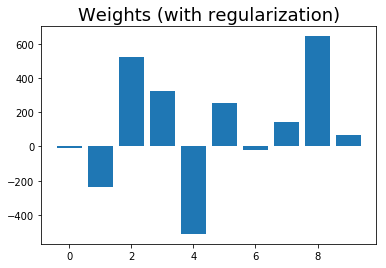

In [56]:
# Reguarization
gamma = 0.005
wR = np.dot( np.dot( np.linalg.inv(np.dot( X.T, X ) + gamma*np.identity(10) ), X.T ), y )
fig=plt.figure(figsize=(6,4))
plt.bar(np.arange(len(wR)), wR)
plt.title("Weights (with regularization)", fontsize=18)

In [57]:
print(np.std(w), np.std(wR))

413.4178771204792 325.32915355729705


[  0.          -0.         487.89292666 163.13595763  -0.
  -0.         -85.43951554   0.         423.41641493   0.        ]


Text(0.5,1,'Weights (Lasso)')

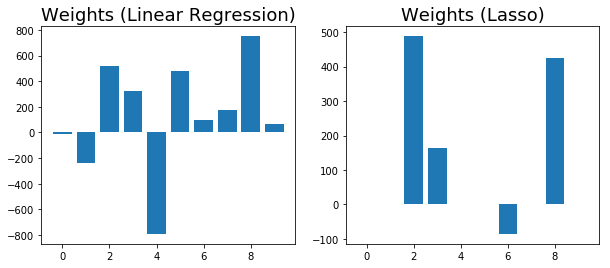

In [72]:
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.4)
ll.fit(X, y)
yh_lasso = ll.predict(X)

print(ll.coef_)

fig=plt.figure(figsize=(10,4))


fig.add_subplot(121)
plt.bar(np.arange(len(w)), w)
plt.title("Weights (Linear Regression)", fontsize=18)

fig.add_subplot(122)
plt.bar(np.arange(len(ll.coef_)), ll.coef_)
plt.title("Weights (Lasso)", fontsize=18)